## Project 1: Global Explanations (Core)

### Explaining Models with Shap
---
* ### Ingrid Arbieto Nelson

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Project-1:-Global-Explanations-(Core)" data-toc-modified-id="Project-1:-Global-Explanations-(Core)-0.1">Project 1: Global Explanations (Core)</a></span><ul class="toc-item"><li><span><a href="#Explaining-Models-with-Shap" data-toc-modified-id="Explaining-Models-with-Shap-0.1.1">Explaining Models with Shap</a></span></li><li><span><a href="#Ingrid-Arbieto-Nelson" data-toc-modified-id="Ingrid-Arbieto-Nelson-0.1.2">Ingrid Arbieto Nelson</a></span></li><li><span><a href="#Task" data-toc-modified-id="Task-0.1.3">Task</a></span></li><li><span><a href="#Project-1-Revisited---Part-2:-Global-Explanations" data-toc-modified-id="Project-1-Revisited---Part-2:-Global-Explanations-0.1.4">Project 1 Revisited - Part 2: Global Explanations</a></span></li></ul></li></ul></li><li><span><a href="#Global-Explanations-with-SHAP" data-toc-modified-id="Global-Explanations-with-SHAP-1">Global Explanations with SHAP</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1">Imports</a></span></li></ul></li><li><span><a href="#Load-Models" data-toc-modified-id="Load-Models-1.1">Load Models</a></span></li><li><span><a href="#SHAP-Explanation-Decision-Tree-Regression" data-toc-modified-id="SHAP-Explanation-Decision-Tree-Regression-1.2">SHAP Explanation Decision Tree Regression</a></span><ul class="toc-item"><li><span><a href="#Food-Item-Sales-:-SHAP-Summary-Bar-Plot" data-toc-modified-id="Food-Item-Sales-:-SHAP-Summary-Bar-Plot-1.2.1">Food Item Sales : SHAP Summary Bar Plot</a></span></li><li><span><a href="#Are-they-the-same-features-in-both?-If-not,-what's-different?" data-toc-modified-id="Are-they-the-same-features-in-both?-If-not,-what's-different?-1.2.2">Are they the same features in both? If not, what's different?</a></span></li><li><span><a href="#Food-Item-Sales-:-SHAP-Summary-Dot-Plot" data-toc-modified-id="Food-Item-Sales-:-SHAP-Summary-Dot-Plot-1.2.3">Food Item Sales : SHAP Summary Dot Plot</a></span></li><li><span><a href="#Top-3-SHAP-Features" data-toc-modified-id="Top-3-SHAP-Features-1.2.4">Top 3 SHAP Features</a></span></li></ul></li></ul></li></ul></div>

### Task
* For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.

### Project 1 Revisited - Part 2: Global Explanations

#### Load Your Saved Joblib File
* Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
* In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
* Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

#### Explain your tree-based model with shap:
* Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
* Create a model explainer,
* Calculate the shap values for your model.
* Create a summary plot - with plot_type='bar':
   * In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
      * Are they the same features in both? If not, what's different?
   * Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
* Create a second summary plot - with plot_type='dot'
   * In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
   * Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

#### Update your README.
* Insert your exported figures and corresponding interpretations from above into your README file. You should have:
   * a summary plot - bar version
      * Your comparison of most important features found by shap vs feature importance.
   * a summary plot - dot version
      * Your interpretation of the top 3 most important features and how they influence your model's predictions.

**Submit the link to your project repository as your final submission for this assignment.**

# Global Explanations with SHAP

### Imports

In [1]:
## standard Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Customization Options
# pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
## set pandas to display more columns
pd.set_option("display.max_columns",50)

## PreProcessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

## Models & evaluation metrics
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import joblib

from sklearn.base import clone

# set random state for reproducibility
SEED = 321
np.random.seed(SEED)
plt.style.use(('ggplot','tableau-colorblind10'))

## Load Models

In [2]:
import joblib
loaded_joblib = joblib.load('Data/best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor'])

In [3]:
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
linreg = loaded_joblib['LinearRegression']
treereg = loaded_joblib['DecisionTreeRegressor']

## SHAP Explanation Decision Tree Regression

In [4]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [5]:
len(X_train_df)

6392

In [6]:
X_shap = shap.sample(X_train_df,nsamples=6000,random_state=SEED)
X_shap

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
4469,7.720000,0.074669,76.3986,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4438,5.110000,0.034868,163.8210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
366,8.050000,0.078386,256.4646,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2219,8.760000,0.050131,128.3336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6080,6.590000,0.176748,82.7908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,12.822634,0.160666,227.5352,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6726,9.300000,0.014041,199.1084,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1815,13.650000,0.072899,198.1426,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6751,14.800000,0.044072,109.0570,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [7]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
          ...    
3809     916.1408
6726     396.8168
1815    1977.4260
6751    1428.1410
7359    3900.9222
Name: Item_Outlet_Sales, Length: 6000, dtype: float64

In [8]:
explainer = shap.Explainer(treereg)
explainer

In [9]:
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(6000, 27)

In [10]:
X_shap.shape

(6000, 27)

### Food Item Sales : SHAP Summary Bar Plot

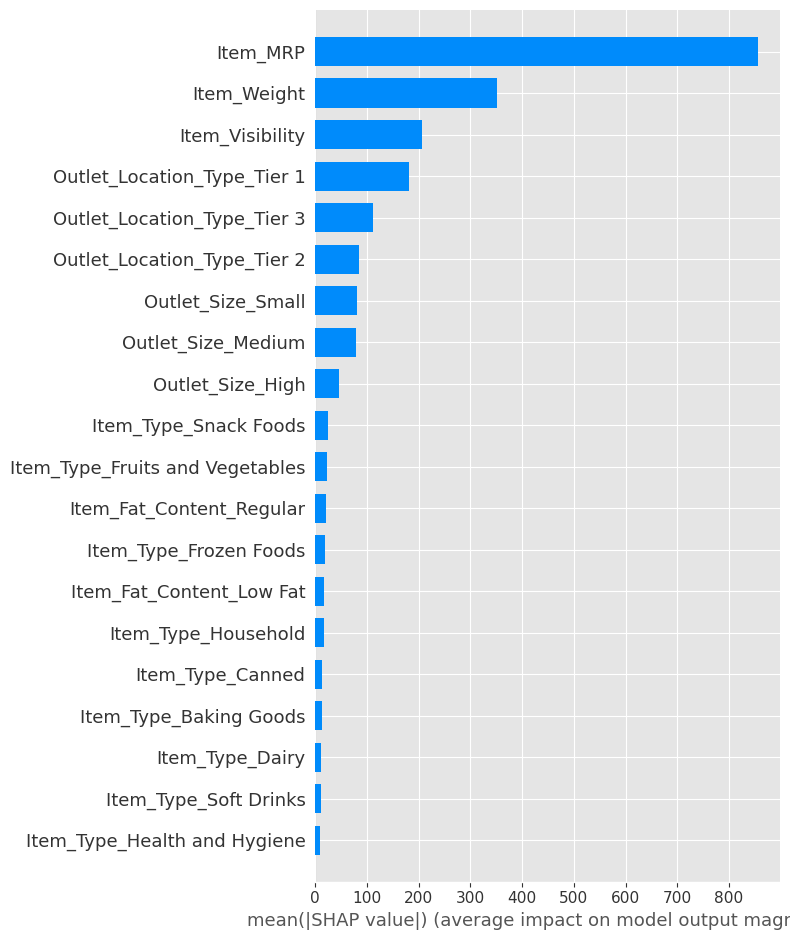

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')
ax.set_title('Summary Bar Plot - Food Sales SHAP Features');
fig.savefig('images/SHAPbar.png',bbox_inches='tight')

<img src='Data/treereg_featureimportance.png'>

### Are they the same features in both? If not, what's different?

#### Top 5 SHAP Features
* Item Price
* Item Weight
* Item Visibility
* Outlet Type : Tier 1
* Outlet Type : Tier 3

#### Top 5 Feature Importances
* Item Price
* Item Weight
* Item Visibility
* Outlet Size : Medium
* Outlet Type : Tier 1


The Top 3 SHAP features, Item Price, Item Weight, and Item Visibility are the same as the original top 3 Feature Importances.

One difference is Tier 1 Outlet is fourth in SHAP Features versus Medium Outlet Size.

Another different is Tier 3 rounds out the top 5 for SHAP features, and Tier 1 Outlets come in fifth for the original Feature Importances.


### Food Item Sales : SHAP Summary Dot Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


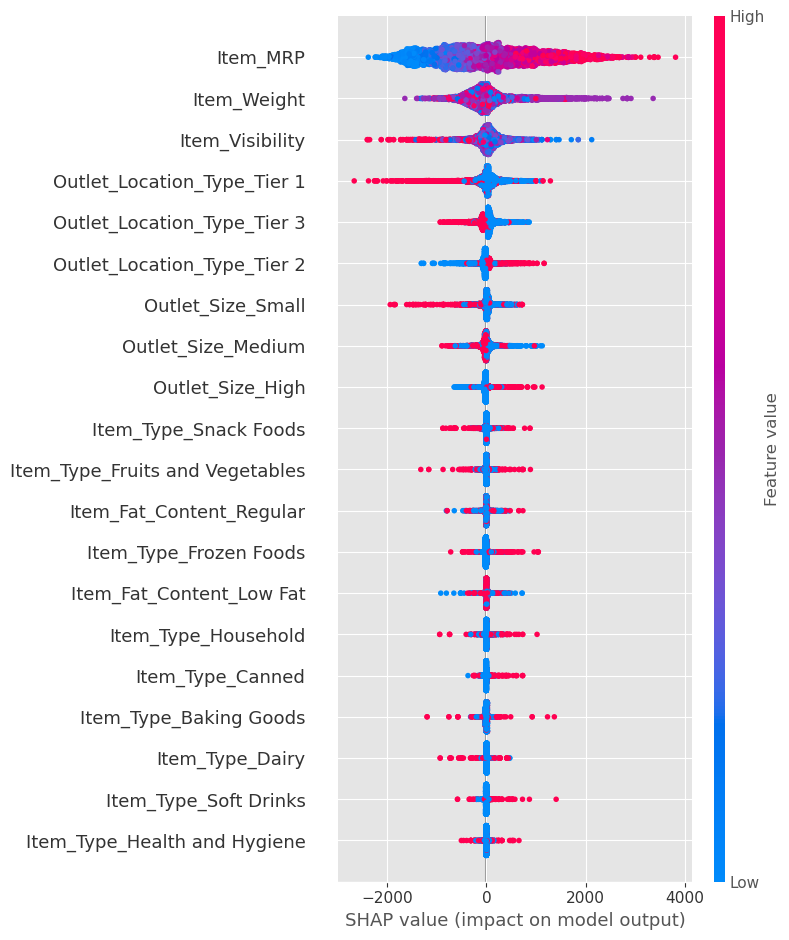

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
shap.summary_plot(shap_values,X_shap)
ax.set_title('Summary Dot Plot - Food Sales SHAP Features');
fig.savefig('images/SHAPdot.png',bbox_inches='tight')

### Top 3 SHAP Features

* #### Item MRP (Price)

   - The higher the price results in greater food item sales.
   
* #### Item Weight

   - There is no correlation between Item Price and food item sales.
   
* #### Item Visibility

   - Less visible items decrease food item sales.